# Desafío - Gráficos y correlación

### 1. Importar librerías y .csv
- Importe las librerías básicas para el análisis de datos
- Descarge e importe el archivo nations.csv . warning: va a encontrar un error en el formato ¿Cómo lo podemos solucionar?.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams['figure.figsize'] = (5,5)
import seaborn as sns

In [2]:
df = pd.read_csv('nations.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf4 in position 1: invalid continuation byte

In [3]:
# Error de encoding, cambiar a latin-1; ISO-8859-1 también funciona
df = pd.read_csv('nations.csv', encoding='latin-1')
df.head()

Unnamed: 0       country  region           gdp    school      adfert  \
0           1       Algeria  Africa   7300.399902  6.716667    7.300000   
1           2         Benin  Africa   1338.800049  3.100000  111.699997   
2           3      Botswana  Africa  12307.400391  8.600000   52.099998   
3           4  Burkina Faso  Africa   1063.400024  1.300000  124.800003   
4           5       Burundi  Africa    349.200012  2.483333   18.600000   

   chldmort       life       pop      urban  femlab   literacy   co2  \
0     34.75  72.316666  34172236  64.933334  0.4522  72.599998  15.0   
1    122.75  54.733334   8237634  41.000000  0.8482  41.700001   1.2   
2     60.25  52.250000   1941233  59.250000  0.8870  84.099998   9.2   
3    170.50  53.783333  15308383  23.583334  0.8584  23.600000   0.2   
4    168.50  48.866665   7821783  10.250000  1.0344  66.599998   0.1   

        gini  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4  33.299999

La base de datos contiene información a nivel mundial sobre demografía:
  - country : País.
  - region : Continente del país.
  - gdp : Producto Interno Bruto per cápita, precios 2005.
  - school : Promedio años de escolaridad.
  - adfert : Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
  - chldmort : Probabilidad de muerte antes de los 5 años por cada 1000.
  - life : Esperanza de vida al nacer.
  - pop : Población total.
  - urban : Porcentaje de población urbana.
  - femlab : Tasa entre hombres y mujeres en el mercado laboral.
  - literacy : Tasa de alfabetismo.
  - co2 : Toneladas de Co2 mitidas per cápita.
  - gini : Coeficiente de desigualdad del ingreso.
  - Apellidos desde la A hasta la N: Enfocarse en las variables chldmort , adfert y life .
  - ***Apellidos desde la M hasta la Z: Enfocarse en las variables femlab , literacy y school .***

### 2. Refactor gráficos matplotlib a seaborn
A continuación se presenta una serie de gráficos construídos con matplotlib . Se le pide
refactorizarlos utilizando seaborn .
Se presenta la función que se utilizó para construírlos. Intente llegar al resultado con mayor
similitud. Comente los principales resultados de los gráficos.

In [4]:
# Original
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))
    
binarize_histogram(df, 'adfert')

In [5]:
# Hacer lo mismo con Seaborn:
def bin_histogram_seaborn(dataframe, variable):
    df_variable_mean = np.mean(dataframe[variable])
    
    dataframe['binarize'] = np.where( dataframe[variable] > df_variable_mean, 'upper', 'lower' )
    lower_mean = dataframe[dataframe['binarize'] == 'lower'][variable].mean()
    upper_mean = dataframe[dataframe['binarize'] == 'upper'][variable].mean()
    
    grid = sns.FacetGrid(dataframe, col='binarize', col_wrap = 2, sharex=False, sharey=False)  # sharex: eje x distinto entre facets!
    grid = grid.map(sns.distplot, variable)    
    grid.fig.set_size_inches(7,5)
       
    grid.facet_axis(0,0)
    plt.axvline(lower_mean, color='darkblue')
    plt.text(lower_mean*1.1, 0.005, "μ: "+str(round(lower_mean,2)))
    
    grid.facet_axis(0,1)
    plt.axvline(upper_mean, color='darkblue')
    plt.text(upper_mean*1.1, 0.008,  "μ: "+str(round(upper_mean,2)))
    

    
bin_histogram_seaborn(df, 'adfert')

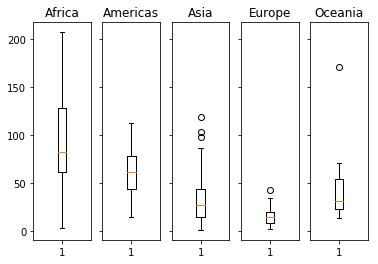

In [6]:
# Original
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        ax[i].boxplot(tmp[tmp[group_by] == n][variable])
        ax[i].set_title(n)

grouped_boxplot(df, 'adfert', 'region')

In [7]:
# Lo mismo con seaborn:
def grouped_boxplot_seaborn(dataframe, variable, group_by):
    sns.boxplot( x=dataframe[group_by], y=dataframe[variable] )
    
grouped_boxplot_seaborn(df, 'adfert', 'region')

In [8]:
# Original
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)

grouped_scatterplot(df, 'school', 'adfert', 'region')

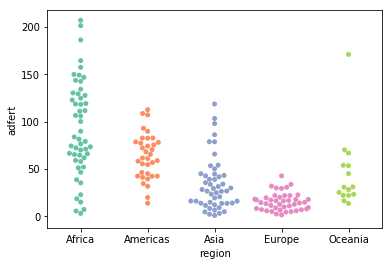

In [9]:
# Lo mismo con Seaborn
def grouped_scatterplot_seaborn(dataframe, x, y, group_by):
    ax = sns.swarmplot( x=dataframe[group_by], y=dataframe[y], palette="Set2",)

grouped_scatterplot_seaborn(df, 'school', 'adfert', 'region') 

### 3. Genere un heatmap entre todas las variables
En base a las variables de interés asignadas, comente cuáles son las principales correlaciones existentes, tomando como criterio de corte aquellas superior a .6

In [10]:
#Generar Correlaciones, considerar variables según mi apellido: 
  #femlab (mortalidad infantil), literacy (alfabetismo) y school (escolaridad)

df_corr = df.loc[:, ~df.columns.str.contains('^Unnamed')].corr()  #Para dejar fuera la columna "Unnamed"

plt.figure(figsize=(15,15)) 
sns.heatmap(df_corr, cmap='BuGn_r', annot=True, linewidth=0.5)

*Al observar las tres variables correspondientes, y considerando mínimo 0.6, se observa:*
- Se observa correlación positiva entre alfabetismo *(literacy)* y escolaridad *(school)*, con 0.85.
- Se observa correlación positiva entre escolaridad y esperanza de vida al nacer *(life)*, con 0.73.
- Es interesante notar que no se observa correlación positiva entre mortalidad infantil *(femlab)* y las otras variables

### 4. En base a las principales correlaciones, sepárelas en un nuevo objeto y calcule la matriz de correlaciones para todas las regiones
- tip: Genere una nueva tabla segmentando con la siguiente sintáxis: tmp = df.loc[:,['variables', 'a', 'agregar']] . No olvide agregar la variable region .
- tip: Genere un loop para recorrer cada región y generar un heatmap.
Comente brevemente las principales correlaciones a través de las regiones.

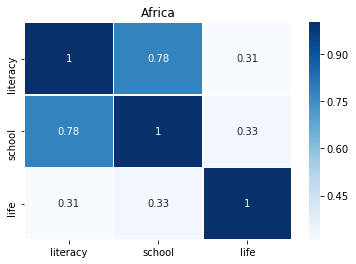

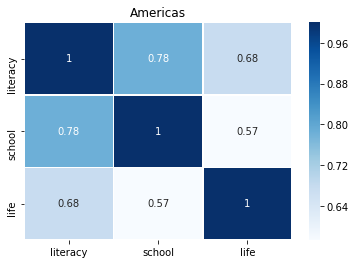

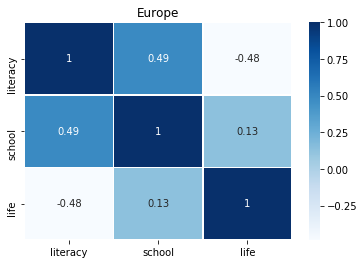

In [11]:
# Considerando que alfabetismo y escolaridad tienen mayor correlación, veamos detalle:
#sns.scatterplot(x='literacy', y='school', hue='region', data=df)

tmp = df.loc[:,['literacy', 'school', 'life', 'region']]
regions = tmp['region'].unique()


for i in regions:
    plt.figure()
    plt.title(i)
    tmp_corr = tmp[tmp['region'] == i].corr()
    sns.heatmap(tmp_corr, cmap='Blues', annot=True, linewidth=0.5)
    
    

### Bonus Points: Grafique los diagramas de dispersión para los principales hallazgos

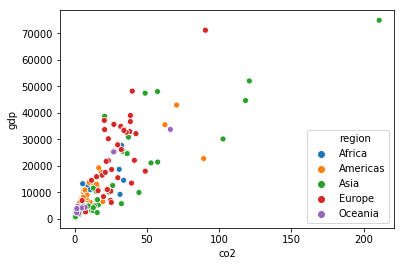

In [15]:
sns.scatterplot(y='gdp', x='co2', hue='region', data=df)

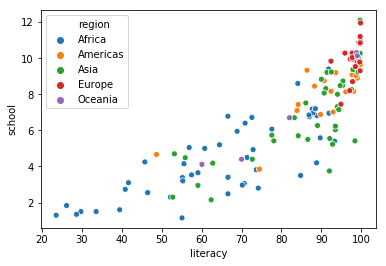

In [17]:
sns.scatterplot(x='literacy', y='school', hue='region', data=df)